In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("EEG data - Sheet1.csv")

In [3]:
df.head()

,Unnamed: 0,alpha1,alpha2,alpha3,alpha4,alpha5,alpha6,alpha7,alpha8,alpha9,...,gamma56,gamma57,gamma58,gamma59,gamma60,gamma61,gamma62,gamma63,gamma64,target
0,0,284.849874,142.644639,121.959358,20.689941,162.718859,96.712580,32.107585,109.816990,82.554413,...,728.620372,357.317390,418.459495,803.357489,622.743387,407.283894,1039.213087,814.602268,495.681338,1
1,1,233.226345,206.517299,176.217193,142.113615,236.910116,214.179673,122.244364,224.277579,206.748386,...,47.706396,22.760991,61.017669,42.583440,32.913916,105.082693,127.043945,149.076038,143.302551,1
2,2,399.259569,422.363340,406.151660,99.736116,532.974104,399.405680,128.695200,440.958308,210.810962,...,52.067200,33.067416,53.119327,40.865276,35.342310,294.777573,606.454735,231.034750,103.109478,1
3,3,838.752489,365.625881,318.992672,88.560230,544.835506,347.261656,121.668737,477.065877,379.691139,...,35.284169,27.243271,48.598166,42.098596,34.789934,152.930283,651.219426,163.767926,110.319292,1
4,4,1282.646997,890.329519,783.534246,292.672272,1250.784307,986.049484,446.149832,1310.041361,1054.326805,...,192.121056,24.736841,217.990994,15.108556,15.609225,74.499232,160.088545,271.600819,107.385538,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Separate features and target variable
X = df.iloc[:, :-1].values  # All columns except the last column as features
y = df.iloc[:, -1].values    # Last column as target

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
# Define the neural network architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Change to softmax if there are more than two classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Change to categorical_crossentropy if more than two classes
              metrics=['accuracy'])

C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.6000 - loss: 0.6575 - val_accuracy: 0.5714 - val_loss: 0.6477
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.4400 - loss: 0.8784 - val_accuracy: 0.5714 - val_loss: 0.6468
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5200 - loss: 0.9167 - val_accuracy: 0.7143 - val_loss: 0.6459
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.4000 - loss: 1.1626 - val_accuracy: 0.7143 - val_loss: 0.6431
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6000 - loss: 0.9859 - val_accuracy: 0.7143 - val_loss: 0.6444
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6400 - loss: 0.7781 - val_accuracy: 0.5714 - val_loss: 0.6475
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7600 - loss: 0.5966 - val_accuracy: 0.5714 - val_loss: 0.6509
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6000 - loss: 0.8003 - val_accuracy: 0.5714 - val_loss: 0.6568
Ep

In [9]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0000e+00 - loss: 2.8480
Test accuracy: 0.0000


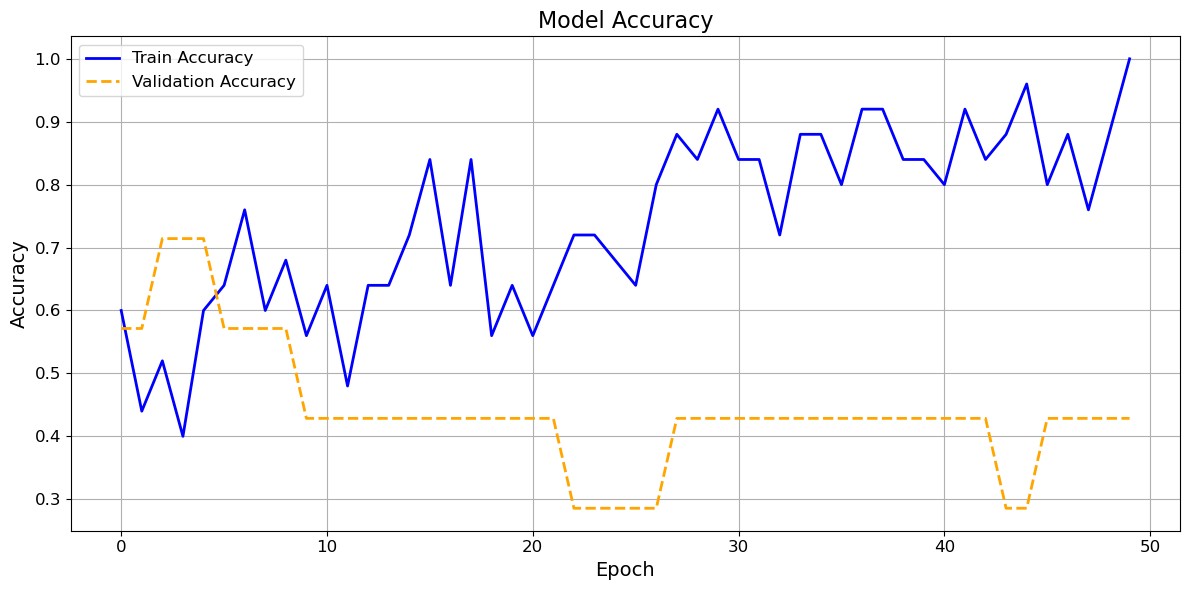

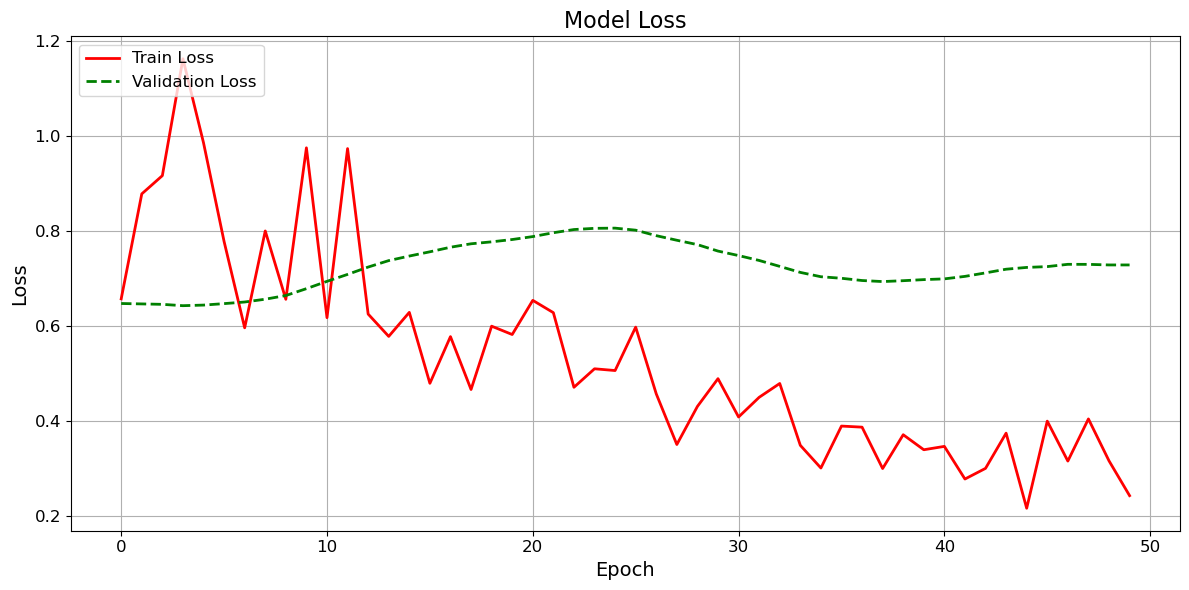

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], color='blue', linestyle='-', linewidth=2, label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', linestyle='--', linewidth=2, label='Validation Accuracy')
plt.title('Model Accuracy', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], color='red', linestyle='-', linewidth=2, label='Train Loss')
plt.plot(history.history['val_loss'], color='green', linestyle='--', linewidth=2, label='Validation Loss')
plt.title('Model Loss', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout for better fit
plt.show()

# Task_1

# 1_Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# Apply a threshold
y_pred_thresholded = np.where(y_pred > 0.5, 1, 0)

# Calculate accuracy and precision
lin_accuracy = accuracy_score(y_test, y_pred_thresholded)
lin_precision = precision_score(y_test, y_pred_thresholded)

print(f'Linear Regression - Accuracy: {lin_accuracy:.4f}, Precision: {lin_precision:.4f}')

Linear Regression - Accuracy: 0.8750, Precision: 1.0000


# Linear Regression Performance:
- Linear regression may struggle with accuracy because it is fundamentally a regression algorithm. 
- Applying a threshold makes it less suited for classification tasks. 
- If the features are not linearly separable, its performance will be poor.

# 2_Support Vector Machine (SVM)

In [16]:
from sklearn.svm import SVC

# Linear SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_svm_linear = svm_linear.predict(X_test)

svm_accuracy_linear = accuracy_score(y_test, y_pred_svm_linear)
svm_precision_linear = precision_score(y_test, y_pred_svm_linear)

print(f'SVM (Linear Kernel) - Accuracy: {svm_accuracy_linear:.4f}, Precision: {svm_precision_linear:.4f}')

# RBF SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_svm_rbf = svm_rbf.predict(X_test)

svm_accuracy_rbf = accuracy_score(y_test, y_pred_svm_rbf)
svm_precision_rbf = precision_score(y_test, y_pred_svm_rbf)

print(f'SVM (RBF Kernel) - Accuracy: {svm_accuracy_rbf:.4f}, Precision: {svm_precision_rbf:.4f}')


SVM (Linear Kernel) - Accuracy: 0.5000, Precision: 0.6667
SVM (RBF Kernel) - Accuracy: 0.2500, Precision: 0.3333


# Support Vector Machine (SVM) Performance: 

- SVMs particularly with RBF kernels, can be very effective for classification tasks. 
- The RBF kernel allows for non-linear decision boundaries, making it suitable for complex datasets. 
- It also focuses on maximizing the margin between classes, which can lead to better generalization. In contrast, a linear kernel may perform well if the data is indeed linearly separable but may struggle otherwise.

# 3_k-Nearest Neighbors (kNN)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

# kNN
knn = KNeighborsClassifier(n_neighbors=5)  # You can experiment with different k values
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)

print(f'kNN - Accuracy: {knn_accuracy:.4f}, Precision: {knn_precision:.4f}')

kNN - Accuracy: 0.2500, Precision: 0.4000


# k-Nearest Neighbors (kNN) Performance:

- kNN can perform well when the data is structured in a way where similar instances are close to one another in feature space. 
- It makes no assumptions about the distribution of data and is sensitive to the choice of 'k' (number of neighbors). 
- It can capture local patterns effectively but can be computationally expensive for large datasets.

# Conclusion of Task 1:
In conclusion, the choice of algorithm depends on the specifics of the dataset 
(e.g., linear vs. non-linear separability, feature correlations) and the inherent 
characteristics of the algorithms themselves.

# Task_2

In [23]:
# Univariate Feature Selection (UFS)

from sklearn.feature_selection import SelectKBest, f_classif

# Apply Univariate Feature Selection
ufs = SelectKBest(score_func=f_classif, k=5)
X_ufs = ufs.fit_transform(X_train, y_train)

# Get the indices of the selected features
ufs_support = ufs.get_support()
ufs_feature_indices = np.where(ufs_support)[0]
ufs_feature_scores = ufs.scores_

# Get the names of the top 5 features
top_ufs_features = np.argsort(ufs_feature_scores)[-5:]

print("Top 5 features from UFS:", top_ufs_features)


Top 5 features from UFS: [286 154 146  10   0]


# Univariate Feature Selection (UFS) Result: 

- UFS relies on statistical metrics (e.g., ANOVA F-statistic) to evaluate each feature's relevance regarding the target variable. 
- The features selected emphasize those with the strongest association with class labels but may not account for interactions between features.

In [25]:
# Recursive Feature Elimination (RFE) 

from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Define a model
model = SVC(kernel='linear')

# Apply RFE
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_train, y_train)

# Get the indices of the selected features
rfe_support = rfe.get_support()
rfe_feature_indices = np.where(rfe_support)[0]

print("Top 5 features from RFE:", rfe_feature_indices)


Top 5 features from RFE: [  0  40 140 163 260]


# Recursive Feature Elimination (RFE) Result: 
- RFE evaluates the effectiveness of features by fitting a model and recursively removing the least important ones. 
- This method is more comprehensive as it considers the feature importance according to the model it uses, leading to potentially different selections than UFS.

In [27]:
# Principal Component Analysis (PCA)

from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Get the components and their explained variance
pca_components = pca.components_
pca_variance = pca.explained_variance_ratio_

# Get the indices of the features that contribute the most
top_pca_features = np.argsort(np.abs(pca_components).sum(axis=0))[-5:]

print("Top features from PCA:", top_pca_features)


Top features from PCA: [142 152  17 155  18]


# Principal Component Analysis (PCA) Result : 

- PCA transforms the original features into a new set of uncorrelated features (principal components) that maximally capture variance. 
- While PCA captures the structure of the data, it often results in combinations of original features rather than selecting individual features directly. 
- Therefore, the "top features" from PCA do not correspond directly to the original features.

# Reasons for Differences in Selected Features
Nature of Methods: 
UFS is univariate while RFE is iterative and considers feature interactions. 
PCA looks at variance and feature correlation, significantly altering the interpretation of feature importance.

Data Structure:
Differences in data structure, correlation, and distribution can lead to varying results among methods.
Feature Relationships:

UFS may overlook features that contribute to classification when considered collectively but are not strong individually, which RFE might identify. PCA may highlight composite relationships rather than isolated relevance.